# Project

## Imports

In [1]:
import functions as fc
from functions import *
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import requests
from pathlib import Path
from torchviz import make_dot
import math
import numpy as np
from scipy.io import loadmat
device = "cuda" if torch.cuda.is_available() else "cpu"
ImportHelperFunctions()
from helper_functions import plot_predictions, plot_decision_boundary

'''MODEL_PATH = Path("modelsOld")


MODEL_NAME = "TestModel.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME'''
'''MODEL_PATH = Path("models")


MODEL_NAME = "TestModelWorks1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME'''



#Use this for new models
#MODEL_PATH = Path("models")


#MODEL_NAME = "TestModelWorksPI3.pth"
#MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


MODEL_PATH = Path("models")


MODEL_NAME = "TestModelWorksPIReal2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the models state_dict

Download helper_functions.py


## Create Model

In [2]:
modelTest=CreateModel(hiddenLayerNum=3, hiddenUnitNum=128, outputNum=1, inputNum=2, nonLinearFunction=nn.ReLU())

modelTest.to(device)
#modelTest.state_dict()

#
#if MODEL_PATH.exists:
    #modelTest.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


Model(
  (layer_In): Linear(in_features=2, out_features=128, bias=True)
  (layer_Out): Linear(in_features=128, out_features=1, bias=True)
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
  )
  (activation): ReLU()
)

## Test print

In [3]:
#X = torch.rand(8,1).to(device)
#make_dot(modelTest(X), params=dict(modelTest.named_parameters()))

## Create data

dict_keys(['__header__', '__version__', '__globals__', 'Th'])
torch.Size([256, 1])


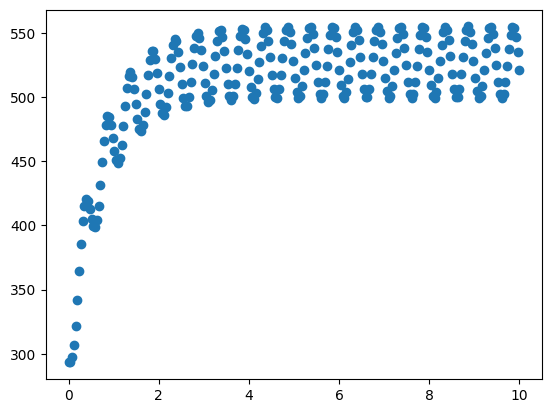

In [4]:
X=[]
y=[]
temp = []

# Load data from .mat file
mat_data = loadmat('heater_temperature.mat')  # Replace 'your_file.mat' with the actual file path
print(mat_data.keys())
vector_key = 'Th'  # Replace 'your_key' with the key of your vector in the .mat file
data = mat_data[vector_key]

# Reshape data as a column vector
data = data.reshape(-1, 1)

# Create time vector from 0 to 10 seconds with 2^8 samples
time = torch.linspace(0, 10, 2**8)




data = torch.Tensor(data)

print(data.shape)

time = torch.Tensor(time).unsqueeze(-1)
plt.scatter(time,data)



## Train/Test Split

torch.Size([160, 2])
torch.Size([160, 1])
torch.Size([40, 2])
torch.Size([40, 1])


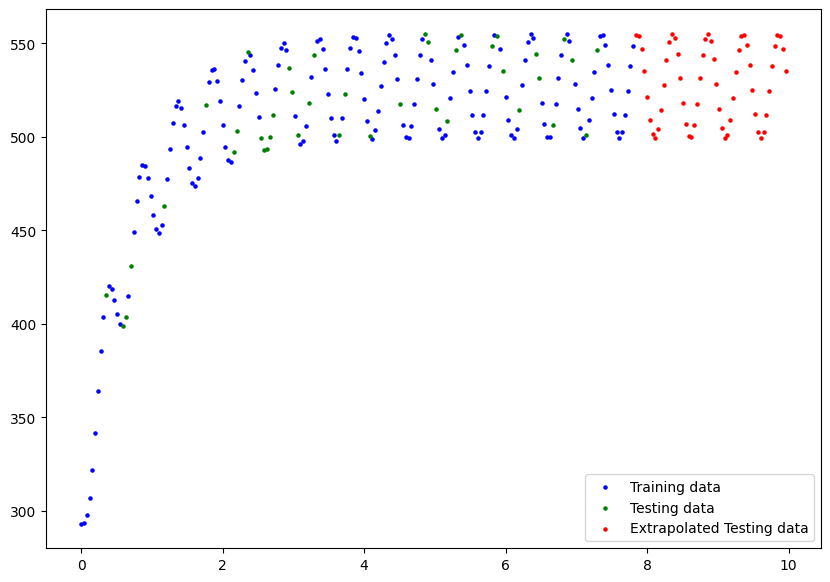

In [5]:






X_temp = torch.cat((time[:200],data[:200]),1)
X_full =torch.cat((time[:len(time)-1],data[:len(data)-1]),1)
y_temp = data[1:201]
y_Full = data[1:len(data)]

X_train, X_test, y_train, y_test = train_test_split(X_temp,
                                                   y_temp,
                                                   test_size=0.2, # 20% will be test
                                                   random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
split_position = 200


#X_train = time[:split_position]
#y_train = data[:split_position]
#X_test = time[split_position:]
#y_test = data[split_position:]
plt.figure(figsize=(10,7))
    
    # Plot training data in blue
plt.scatter(X_train[:,0], X_train[:,1], c="b", s=5, label="Training data")
    
    # Plot test data in green
plt.scatter(X_test[:,0], X_test[:,1], c="g", s=5, label="Testing data")
plt.scatter(X_full[200:,0], X_full[200:,1], c="r", s=5, label="Extrapolated Testing data")
plt.legend()

## Setup loss and optimizerFunction

In [6]:
loss_fn = nn.MSELoss()


## Train and test loop


In [26]:
#Write a training and evaluation loop



test_pred = torch.tensor(0)
y_pred = torch.tensor(0)
X_train, y_train = X_train.type(torch.float32), y_train.type(torch.float32)
X_test, y_test = X_test.type(torch.float32), y_test.type(torch.float32)
test_pred = test_pred.type(torch.float32)
y_pred = test_pred.type(torch.float32)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

test_pred = test_pred.to(device)
y_pred = test_pred.type(torch.float32)


for i in range(1):
    y_pred,test_pred, loss_values,test_loss,epochs,lr_values= TrainModelPI(model=modelTest,epochs=30000, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
                    isClassification=False, loss_fn=loss_fn, lr=0.001)


#fc.plot_predictions(X_train,y_train,X_test,y_test,y_pred,test_pred)


#print(test_loss)
#print(epoch)
#print(learning_rate)
#loss = loss.to("cpu")
#test_loss = test_loss.to("cpu")
#epoch = epoch.to("cpu")
#learning_rate = learning_rate.to("cpu")
'''
plt.figure()
plt.subplot(1,2,1)
plt.plot(epoch,loss,label="Loss")
plt.plot(epoch,test_loss,label="Test loss")
plt.legend(prop={"size": 14})
plt.subplot(1,2,2)
plt.plot(epoch[100:],loss[100:],label="Loss")
plt.plot(epoch[100:],test_loss[100:],label="Test loss")
plt.legend(prop={"size": 14})
plt.figure()
plt.plot(epoch,learning_rate, label = "Learning Rate")
plt.legend(prop={"size": 14})'''

MODEL_PATH = Path("models")


MODEL_NAME = "TestModelWorksPIMightWork.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the models state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=modelTest.state_dict(), f=MODEL_SAVE_PATH) # Can also just save the model


Epoch: 0 | Loss: 236538025738240.00000, Acc: 0.00% | Test loss: 23718636027904.00000, Test acc: 0.00%| PI loss: 236533227454464.00000%
Saving model to: models\TestModelTEST.pth
Epoch: 100 | Loss: 236542387814400.00000, Acc: 0.00% | Test loss: 2632470528.00000, Test acc: 0.00%| PI loss: 236537790857216.00000%
Saving model to: models\TestModelTEST.pth
Epoch: 200 | Loss: 236542891130880.00000, Acc: 0.00% | Test loss: 2526676224.00000, Test acc: 0.00%| PI loss: 236538696826880.00000%
Saving model to: models\TestModelTEST.pth
Epoch: 300 | Loss: 236543428001792.00000, Acc: 0.00% | Test loss: 2420210176.00000, Test acc: 0.00%| PI loss: 236539384692736.00000%
Saving model to: models\TestModelTEST.pth
Epoch: 400 | Loss: 236543344115712.00000, Acc: 0.00% | Test loss: 2597788416.00000, Test acc: 0.00%| PI loss: 236539049148416.00000%
Saving model to: models\TestModelTEST.pth
Epoch: 500 | Loss: 236543646105600.00000, Acc: 0.00% | Test loss: 2741141760.00000, Test acc: 0.00%| PI loss: 2365391162572

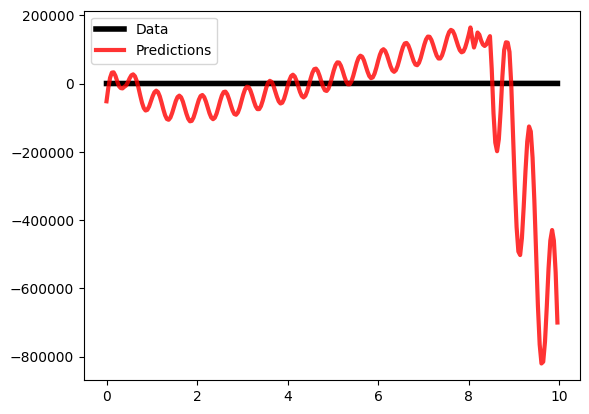

In [25]:


plt.figure()
X_train = X_train.to("cpu")
y_pred = y_pred.to("cpu")
X_test = X_test.to("cpu")
test_pred = test_pred.to("cpu")

dataX= torch.cat((X_train[:,0],X_test[:,0]),0).to("cpu")
datay= torch.cat((y_train,y_test),0).to("cpu")
predData= torch.cat((y_pred,test_pred),0)


X_full =torch.cat((time[:len(time)-1],data[:len(data)-1]),1)
y_Full = data[1:len(data)]


X_full = X_full.to(device)

y_model_test=modelTest(X_full).to(device)
X_full = X_full.to("cpu").detach().numpy()
y_model_test = y_model_test.to("cpu").detach().numpy()

#plt.scatter(dataX,datay,c="black",label = "Data",linewidth=2, alpha=1)
plt.plot(X_full[:,0],y_Full,c="black",label = "Data",linewidth=4, alpha=1)
plt.plot(X_full[:,0],y_model_test,c="r",linewidth=3, alpha=0.8,label = "Predictions")
plt.legend()
